# `dfply` Integration

---

`grama` is designed to integrate easily with [dfply](https://github.com/kieferk/dfply). Chaining model and data manipulations with pipes allows one to quickly investigate models.

In [1]:
import grama as gr
import seaborn as sns

from dfply import *
from grama.models import model_cantilever_beam

Perform a sinew analysis of the cantilever beam model.

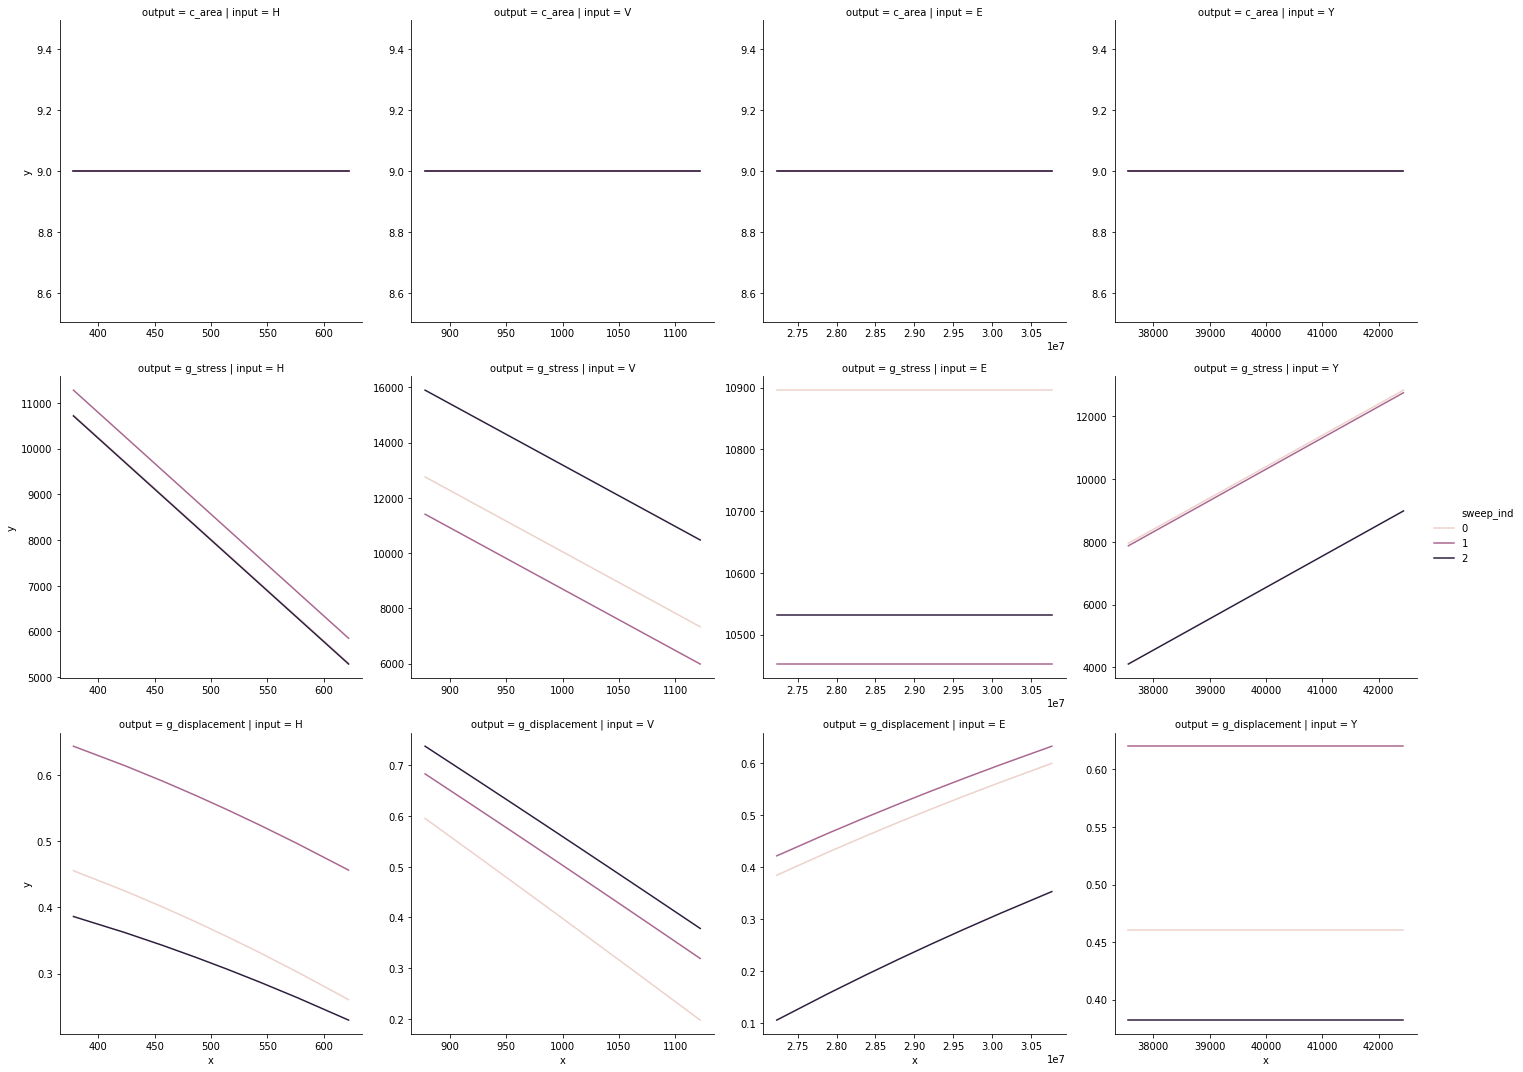

In [2]:
## Define the base model
model = model_cantilever_beam()

## Model analysis pipeline
df_res = \
    model >> \
    gr.ev_sinews() >> \
    gather("input", "x", model.domain.inputs) >> \
    gather("output", "y", model.outputs) >> \
    filter_by(X.y > -np.Inf, X.y < +np.Inf, X.sweep_var == X.input)

## Construct the sinew plot
sns.relplot(
    data=df_res,
    x="x",
    y="y",
    hue="sweep_ind",
    col="input",
    row="output",
    kind="line",
    facet_kws=dict(sharex=False, sharey=False)
)